# **Installing Packages**

In [ ]:
!pip install yfinance
!pip install pandas 
!pip install matplotlib
!pip install numpy
!pip install mpl.finance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Importing libraries**

In [ ]:
import numpy as np
import yfinance as yf
from yfinance import Ticker
import pandas as pd
import matplotlib.pyplot as plt
import mpl_finance
import matplotlib.dates as mdates

# **Fetching stock data**

In [ ]:
ticker = Ticker("MSFT")
df = ticker.history(period="1y")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-12-21 00:00:00-05:00,320.288842,324.687627,316.831220,324.251709,24740600,0.0,0.0
2021-12-22 00:00:00-05:00,325.252336,330.513040,322.726020,330.106873,24831500,0.0,0.0
2021-12-23 00:00:00-05:00,329.661045,333.267269,329.641242,331.583038,19617800,0.0,0.0
2021-12-27 00:00:00-05:00,332.345865,339.300716,332.316144,339.270996,19947000,0.0,0.0
2021-12-28 00:00:00-05:00,339.964448,340.618325,337.160733,338.082092,15661500,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-15 00:00:00-05:00,253.720001,254.199997,247.339996,249.009995,35560400,0.0,0.0
2022-12-16 00:00:00-05:00,248.550003,249.839996,243.509995,244.690002,86088100,0.0,0.0
2022-12-19 00:00:00-05:00,244.860001,245.210007,238.710007,240.449997,29696400,0.0,0.0


# **Acceleration Bands**

Acceleration bands are a type of volatility indicator that is based on the standard deviation of price movements. 

*   Central line = moving average
*  Upper band = moving average + (acceleration factor * standard deviation)
*   Lower band = moving average - (acceleration factor * standard deviation)

The acceleration factor is typically set between 0 and 1, with higher values resulting in more sensitive bands that are more responsive to changes in price volatility.


In [ ]:
# Calculate the moving average
ma = df["Close"].rolling(window=20).mean()

# Calculate the standard deviation
std = df["Close"].rolling(window=20).std()

# Calculate the upper and lower bands for acceleration bands with an acceleration factor of 0.5
upper_band = ma + (0.5 * std)
lower_band = ma - (0.5 * std)

# Plotting the bands

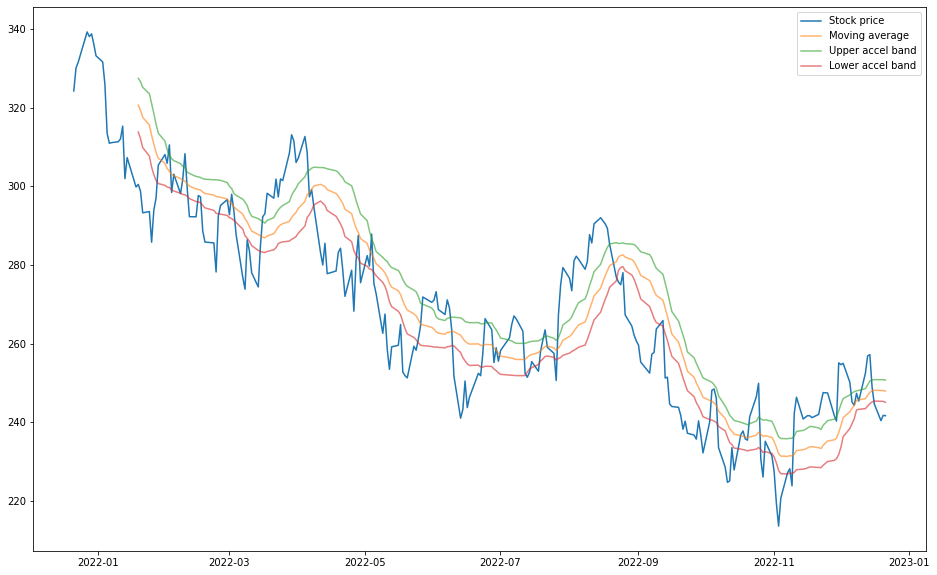

In [ ]:
fig, ax = plt.subplots(figsize=(16,10))
plt.plot(df["Close"], label="Stock price")
plt.plot(ma, label="Moving average", alpha=0.6)
plt.plot(upper_band, label="Upper accel band", alpha=0.6)
plt.plot(lower_band, label="Lower accel band", alpha=0.6)
plt.legend()
plt.show()


# **Strategy**

*   'Buy' when the price breaks above the upper band
*   'Sell' when the price falls below the lower band



In [ ]:
df["Signal"] = ""

# Iterate through the data and look for potential buy and sell signals
for i in range(len(df)):
    if df["Close"][i] > upper_band[i]:
        df.at[df.index[i], "Signal"] = "buy"
    elif df["Close"][i] < lower_band[i]:
        df.at[df.index[i], "Signal"] = "sell"

# Generating and Plotting 'buy' and 'sell' signals

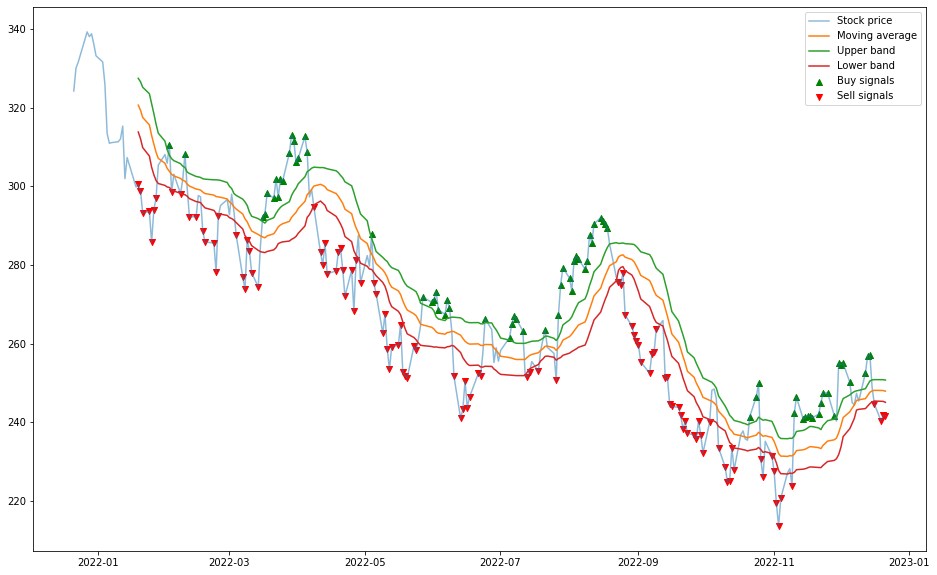

In [ ]:
fig, ax = plt.subplots(figsize=(16,10))
plt.plot(df["Close"], label="Stock price", alpha=0.5)
plt.plot(ma, label="Moving average")
plt.plot(upper_band, label="Upper band")
plt.plot(lower_band, label="Lower band")

buy_signals = df[df["Signal"] == "buy"]
sell_signals = df[df["Signal"] == "sell"]

plt.scatter(buy_signals.index, buy_signals["Close"], color="green",  marker='^', label="Buy signals")
plt.scatter(sell_signals.index, sell_signals["Close"], color="red",  marker='v', label="Sell signals")

plt.legend()
plt.show()

# Calculating Returns

In [ ]:
# Initializing a variable to track the current position
position = "none"
percentage_returns = []

for i in range(len(df)):
    if df["Close"][i] > upper_band[i] and position == "none":
        df.at[df.index[i], "Signal"] = "buy"
        position = "long"
        buy_price = df["Close"][i]
    elif df["Close"][i] < lower_band[i] and position == "long":
        df.at[df.index[i], "Signal"] = "sell"
        position = "none"
        sell_price = df["Close"][i]
        percentage_return = (sell_price / buy_price) - 1
        percentage_returns.append(percentage_return)


In [ ]:
total_percentage_return = sum(percentage_returns)
print("Total percentage return:", total_percentage_return, "%")

Total percentage return: -0.3085248983950646 %


# **Volume Weighted Average Price**

 VWAP (Volume Weighted Average Price) is a trading indicator that is used to calculate the average price of a security over a specific period of time, taking into account the volume traded during that period.



>  Σ (Volume x Price)/ Σ Volume








In [ ]:
n=30 #period
vwap = [(df.iloc[i:i+n]['Close'] * df.iloc[i:i+n]['Volume']).sum() / df.iloc[i:i+n]['Volume'].sum() for i in range(len(df)-30)]


In [ ]:
dates = df.index[30:]
times = mdates.date2num(dates)

#Plotting VWAP

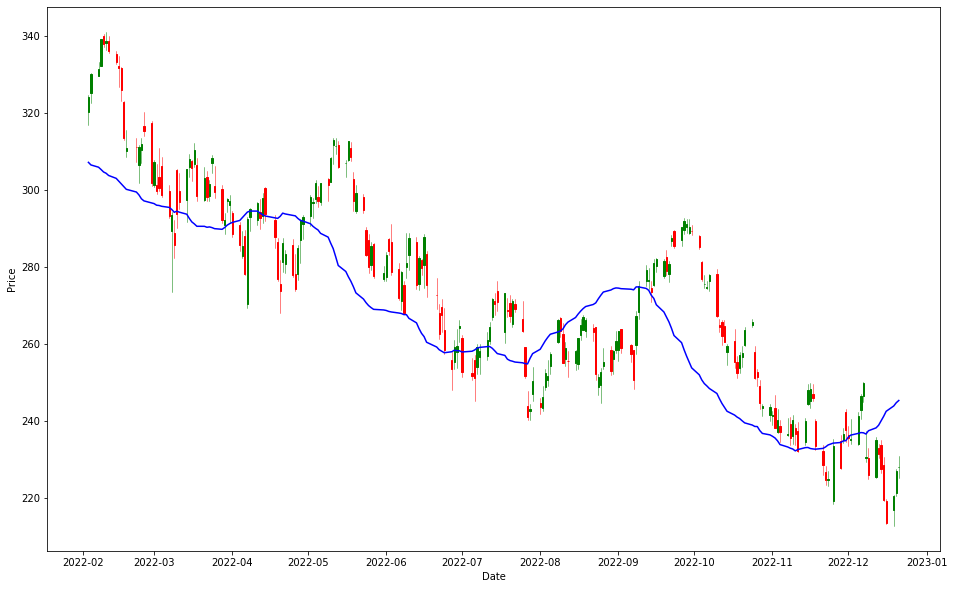

In [ ]:
fig, ax = plt.subplots(figsize=(16,10))
# Convert the stock data to a list of (time, open, high, low, close) tuples
ohlc = [(time, open, high, low, close) for (time, (open, high, low, close)) in zip(times, df[['Open', 'High', 'Low', 'Close']].values)]
# Plot the candlestick chart
mpl_finance.candlestick_ohlc(ax, ohlc, width=0.5, colorup='g', colordown='r')
ax.plot(dates, vwap, color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.show()

# **Strategy**

*   "BUY" if the current price is less than the VWAP
*   "SELL" if the current price is greater than the VWAP
*   "HOLD" if the current price is equal to the VWAP

In [ ]:
current_price = df['Close'].iloc[-1]

In [ ]:
# Compare the current price to the VWAP
if current_price < vwap[-1]:
    print("BUY")
elif current_price > vwap[-1]:
    print("SELL")
else:
    print("HOLD")
dates = df.index.tolist()

BUY


# Generating and plotting 'buy' and 'sell' signals

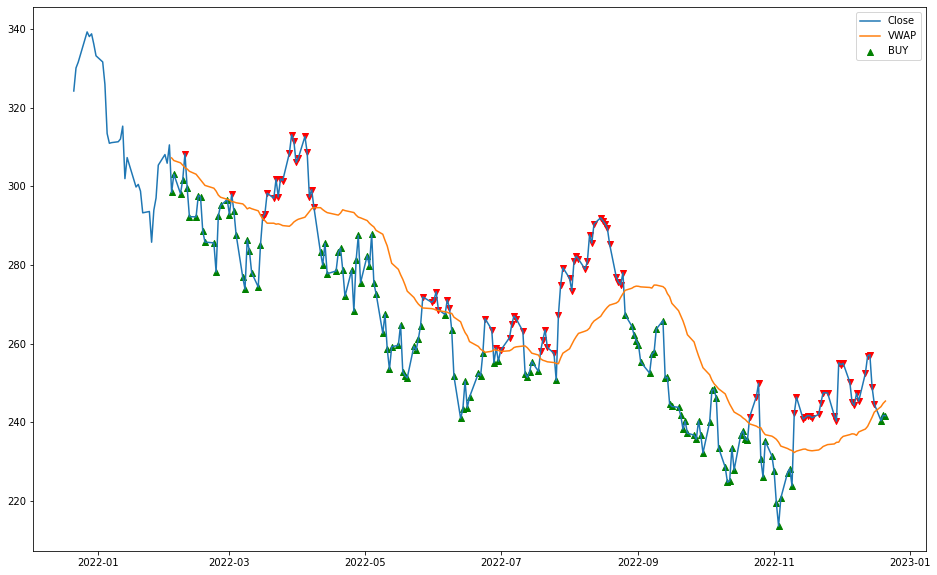

In [ ]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(dates, df['Close'], label='Close')
ax.plot(dates[-len(vwap):], vwap, label='VWAP')

# Add buy and sell markers to the plot
for i, price in enumerate(df['Close'][-len(vwap):]):
    if price < vwap[i]:
        ax.scatter(dates[-len(vwap)+i], price, c='green', marker='^', label='BUY' if i==0 else "")
    elif price > vwap[i]:
        ax.scatter(dates[-len(vwap)+i], price, c='red', marker='v', label='SELL' if i==0 else "")

# Add a legend and show the plot
ax.legend()
plt.show()

# Calculating returns

In [ ]:
# Initialize a variable to track the current position (either "long" or "short")
position = "short"

initial_investment = 100

# Initialize variables to track the profit and loss
profit = 0
loss = 0

# Iterate over the data and compute the returns
for i, row in df.iterrows():
    # Get the current price and VWAP
    current_price = row['Close']
    
    # Get the index of the current row in the dataframe
    idx = df.index.get_loc(i)
    if idx < n:
      current_vwap = vwap[idx]
    else:
      continue
    
    # Check if we need to enter or exit a position
    if position == "short" and current_price < current_vwap:
        # Enter a long position
        position = "long"
        entry_price = current_price
    elif position == "long" and current_price > current_vwap:
        # Exit the long position
        position = "short"
        exit_price = current_price
        
        # Update the profit/loss
        pnl = exit_price - entry_price
        if pnl > 0:
            profit += pnl
        else:
            loss += pnl

# Compute the total return
total_return = profit + loss

# Compute the return in percent
return_in_percent = (total_return / initial_investment) * 100

print(f"Returns: {return_in_percent:.2f}%")


Returns: 3.77%
